# Reproducing the Figures

All steps in this notebook assume that the downloaded data in `./data/` has not been modified.

## Prepare the protein dataset

In [ ]:
!python3 pipeline/dataset/preparation/generate_proteins_table.py

## Prepare annotations

In [ ]:
import sys
sys.path.append("./pipeline")
import pipeline

model_id = 170

anns_df = pipeline.create_anns_dataframe(model_id)
anns_df.to_csv('data/annotations/annotations.csv')

## Figure 2

We perform 3 runs of the pipeline to generate the data with the following runscript

In [ ]:
!bash scripts/figure2.sh

We can then create the plots using the data from the results folder

findfont: Font family ['Inter'] not found. Falling back to DejaVu Sans.


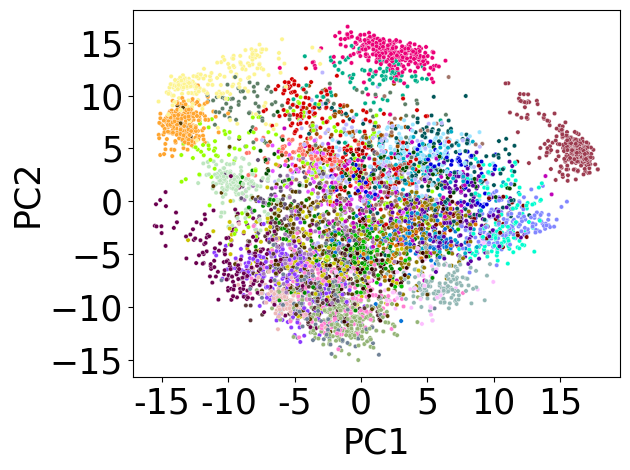

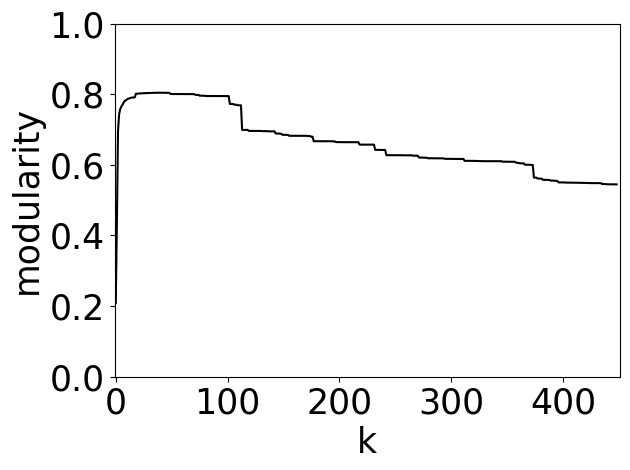

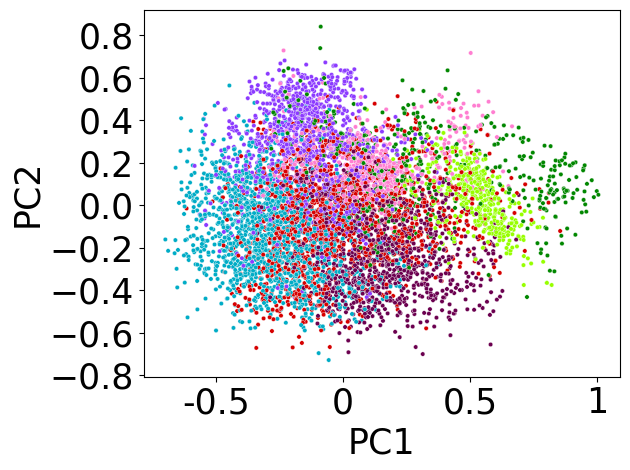

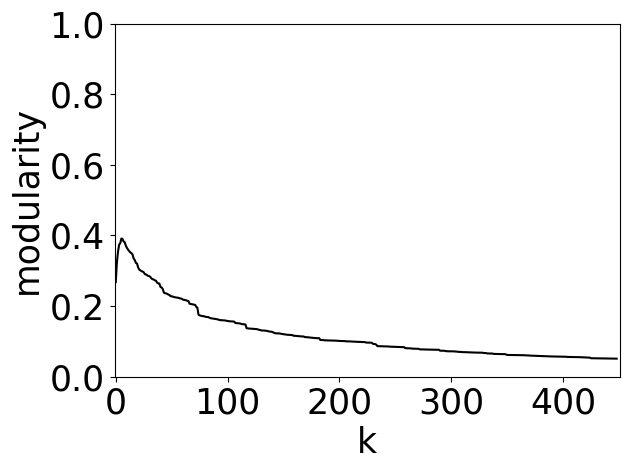

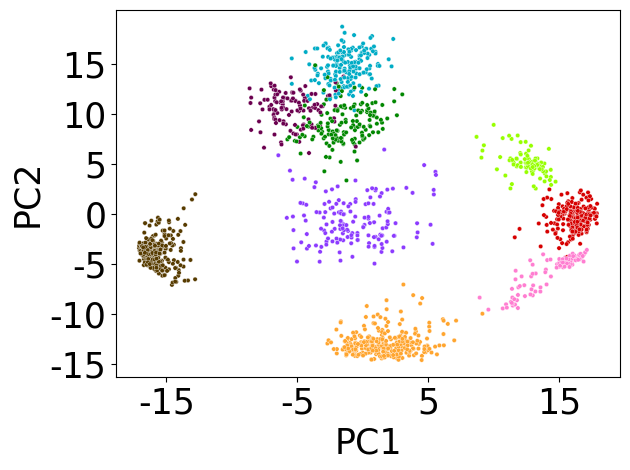

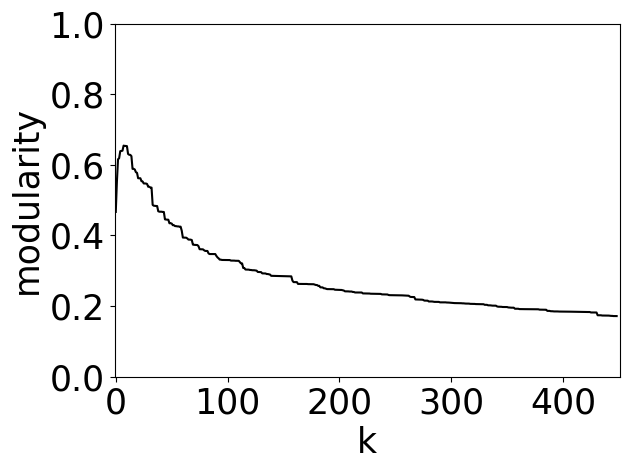

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import colorcet as cc
import os

def get_data(res_dir: str):

    return pd.read_csv(res_dir+'/agglomerative_modularity_scores_vs_params.csv'), \
           pd.read_csv(res_dir+'/latent_coords.csv'), \
           pd.read_csv(res_dir+'/cluster_labels.csv')

def make_scatter_modularity(modularity, coords, labels, xticks = None, yticks = None):

    fontsz = 25
    s = 10
    palette = sns.color_palette(cc.glasbey, n_colors=labels['agglomerative'].nunique())
    plt.figure(figsize=(6.4, 4.8))

    # make the scatterplot
    red = PCA(2)
    X = red.fit_transform(coords.to_numpy()[:,1:]).T
    labels['x'] = X[0]
    labels['y'] = X[1]

    ax = sns.scatterplot(data= labels, x='x', y='y', hue='agglomerative', palette=palette, legend=False, s=s)
    ax.set_xlabel('PC1', fontsize=fontsz)
    ax.set_ylabel('PC2', fontsize=fontsz)

    if xticks is not None:
        plt.xticks(xticks, labels = xticks, fontsize=fontsz)
    if yticks is not None:
        plt.yticks(yticks, labels = yticks, fontsize=fontsz)

    plt.xticks(fontsize=25, fontname='Inter')
    plt.yticks(fontsize=25, fontname='Inter')

    plt.tight_layout()
    plt.show()

    # make the modularity plot

    plt.figure(figsize=(6.4, 4.8))

    plt.plot(modularity.index, modularity['modularity'], c='black')

    plt.ylabel('modularity', fontsize=25, fontname='Inter')
    plt.ylim(0,1)
    plt.xlim(-1,451)

    plt.xlabel('k', fontsize=25, fontname='Inter')
    plt.xticks(range(0,500,100), fontsize=25, fontname='Inter')
    plt.yticks(fontsize=25, fontname='Inter')

    plt.tight_layout()
    plt.show()


base_dir = os.getcwd()+'/results/figure2'

res_dir = base_dir+'/all_pca'
modularity, coords, labels = get_data(res_dir)
make_scatter_modularity(modularity, coords, labels, range(-15,20,5))

res_dir = base_dir+'/all_autoencoder'
modularity, coords, labels = get_data(res_dir)
make_scatter_modularity(modularity, coords, labels, [-0.5, 0, 0.5, 1])

res_dir = base_dir+'/top10_pca'
modularity, coords, labels = get_data(res_dir)

#changed cluster labels for visibility purposes: 4<->6 4<->8 4<->5 3<->7

labels['agglomerative'].replace(4,40, inplace=True)
labels['agglomerative'].replace(6,4, inplace=True)
labels['agglomerative'].replace(40,6, inplace=True)

labels['agglomerative'].replace(4,50, inplace=True)
labels['agglomerative'].replace(8,4, inplace=True)
labels['agglomerative'].replace(50,8, inplace=True)

labels['agglomerative'].replace(5,50, inplace=True)
labels['agglomerative'].replace(4,5, inplace=True)
labels['agglomerative'].replace(50,4, inplace=True)

labels['agglomerative'].replace(3,30, inplace=True)
labels['agglomerative'].replace(7,3, inplace=True)
labels['agglomerative'].replace(30,7, inplace=True)

make_scatter_modularity(modularity, coords, labels, [-15, -5, 5, 15], range(-15, 20, 5))

## Figure 3

We can reuse the data from Figure 2 to perform further analyses on the top 10 dataset

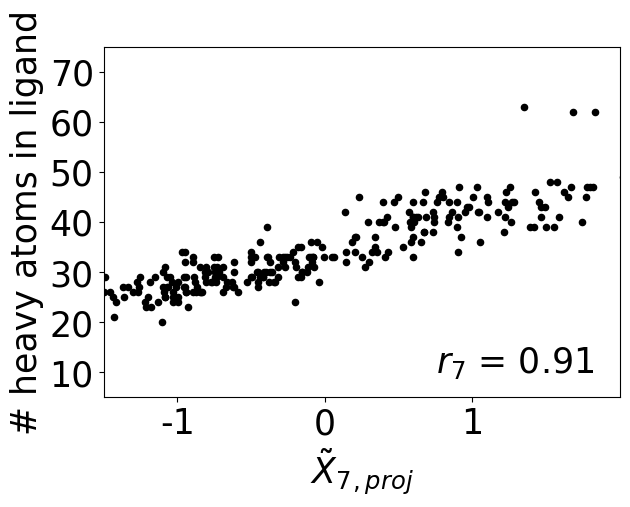

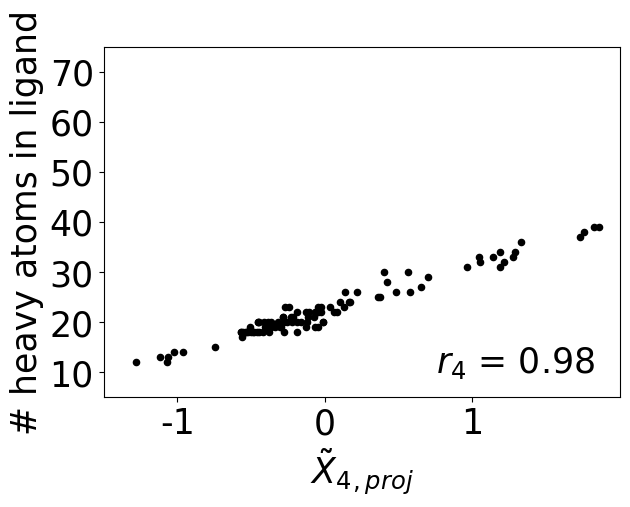

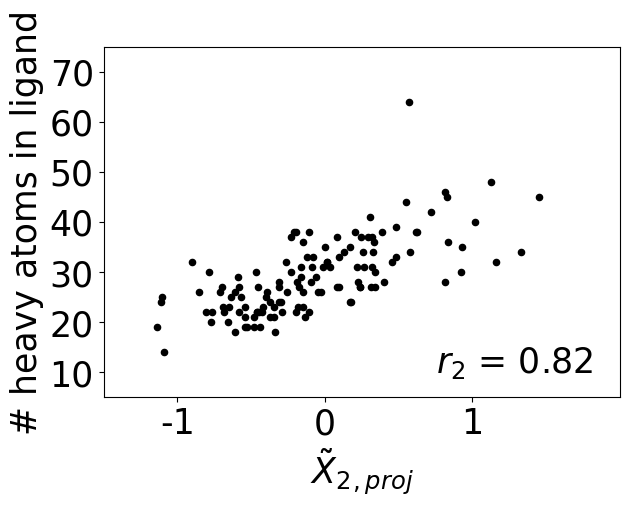

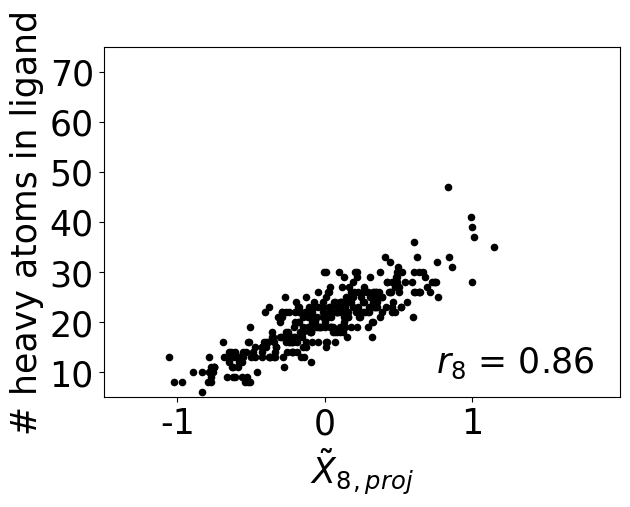

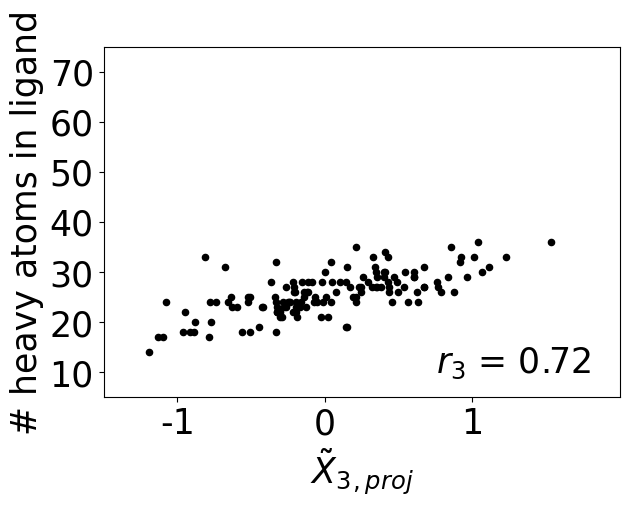

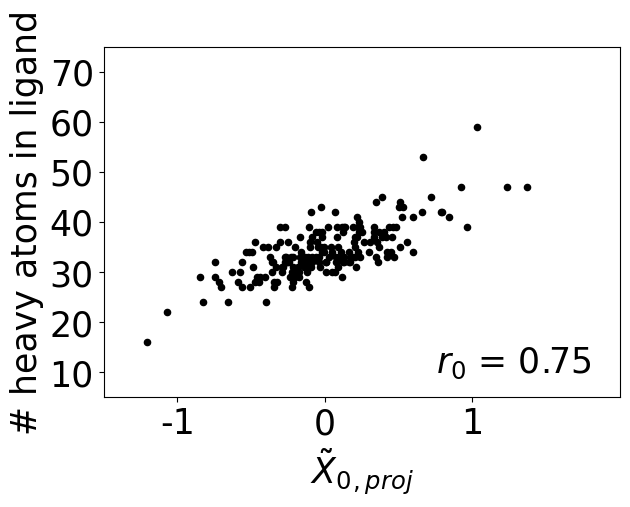

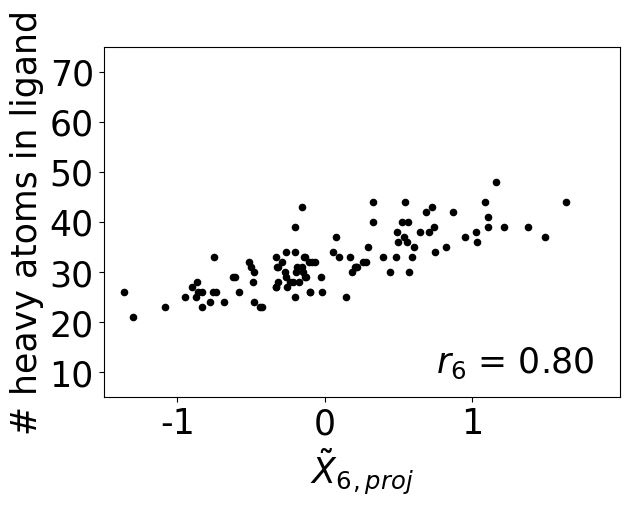

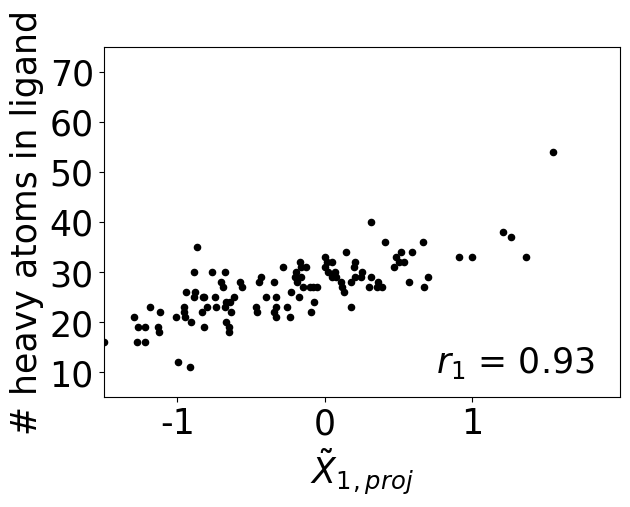

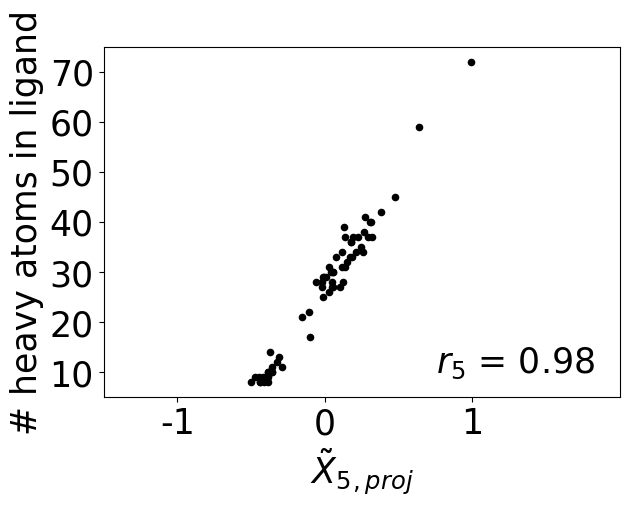

/Users/flohmann/Documents/ETH/ProteinLatentSpaces/correlation_analysis/correlation.py:214: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  sns.scatterplot(df, x='PC1', y='PC2', hue=CLUSTER_METHOD, palette=sns.color_palette(cc.glasbey, n_colors=11), legend=None, s=20)


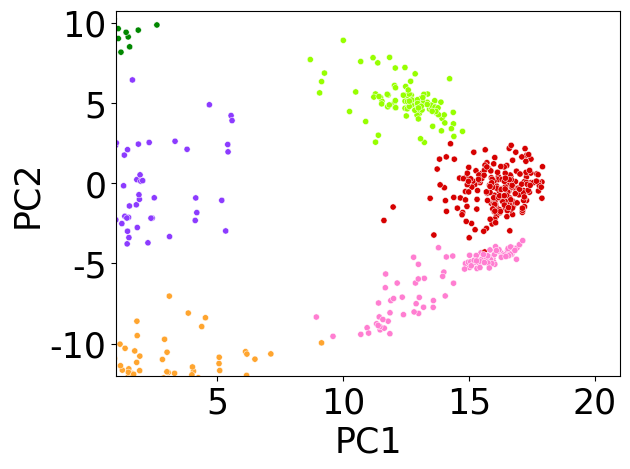

In [2]:
import os
import pandas as pd
from correlation_analysis.correlation import perform_correlation_analysis

path_to_data = os.getcwd()+'/results/figure2/top10_pca/'

coords_df = pd.read_csv(f'{path_to_data}latent_coords.csv', index_col=0)
labels_df = pd.read_csv(f'{path_to_data}cluster_labels.csv', index_col=0)
anns_df = pd.read_csv(os.getcwd()+'/data/annotations/annotations.csv', index_col=0)

#changed cluster labels for visibility purposes: 4<->6 4<->8 4<->5 3<->7

labels_df['agglomerative'].replace(4,40, inplace=True)
labels_df['agglomerative'].replace(6,4, inplace=True)
labels_df['agglomerative'].replace(40,6, inplace=True)

labels_df['agglomerative'].replace(4,50, inplace=True)
labels_df['agglomerative'].replace(8,4, inplace=True)
labels_df['agglomerative'].replace(50,8, inplace=True)

labels_df['agglomerative'].replace(5,50, inplace=True)
labels_df['agglomerative'].replace(4,5, inplace=True)
labels_df['agglomerative'].replace(50,4, inplace=True)

labels_df['agglomerative'].replace(3,30, inplace=True)
labels_df['agglomerative'].replace(7,3, inplace=True)
labels_df['agglomerative'].replace(30,7, inplace=True)

perform_correlation_analysis('ligand_n_ha', coords_df, labels_df, anns_df, False)

## Figure 4

We perform another run of the pipeline using the autoencoder and the optimal hyperparameter (7 clusters) found during the run above

In [ ]:
!bash scripts/figure4.sh

We then perform additional analyses on the data to create the plots

findfont: Font family ['Inter'] not found. Falling back to DejaVu Sans.


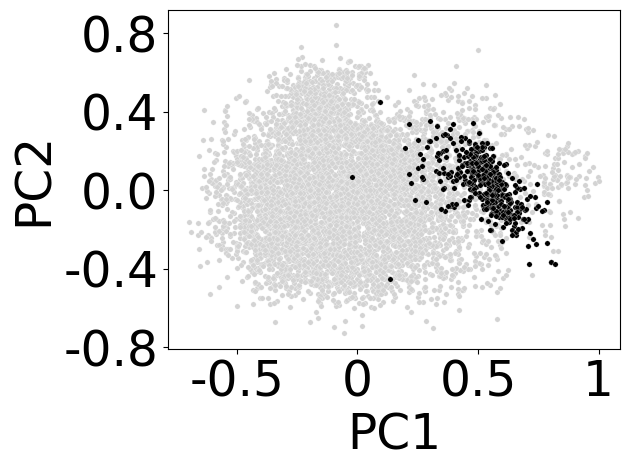

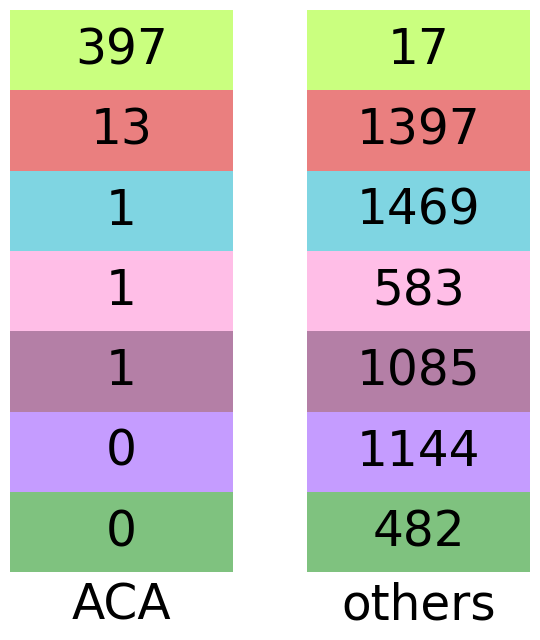

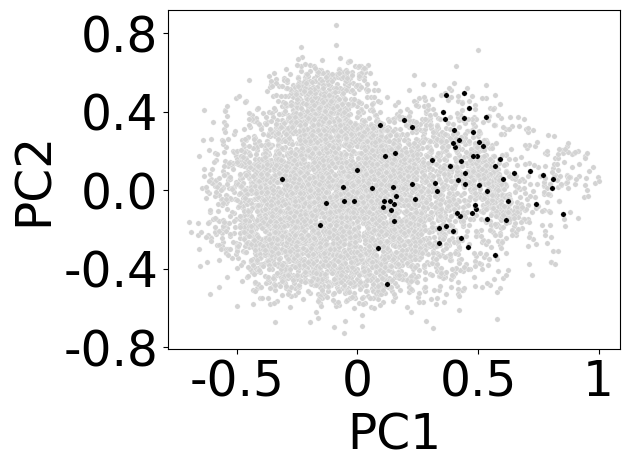

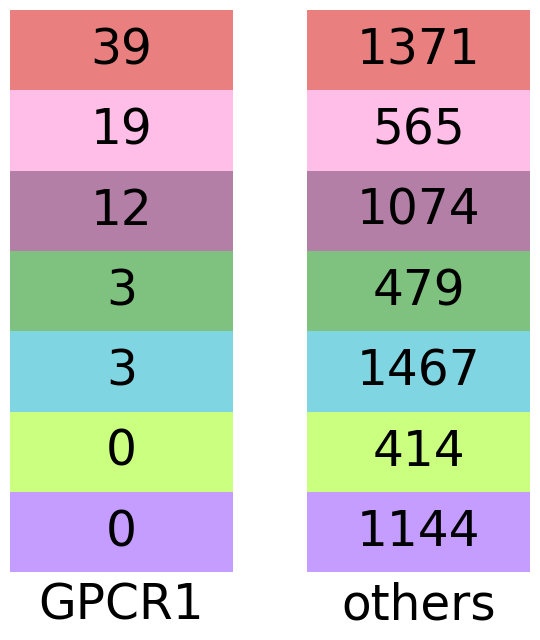

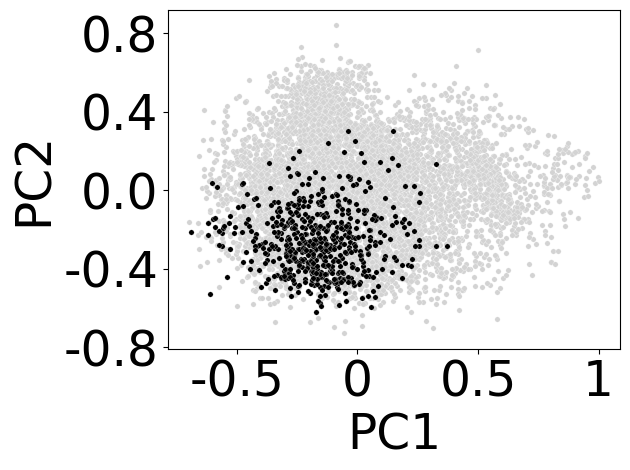

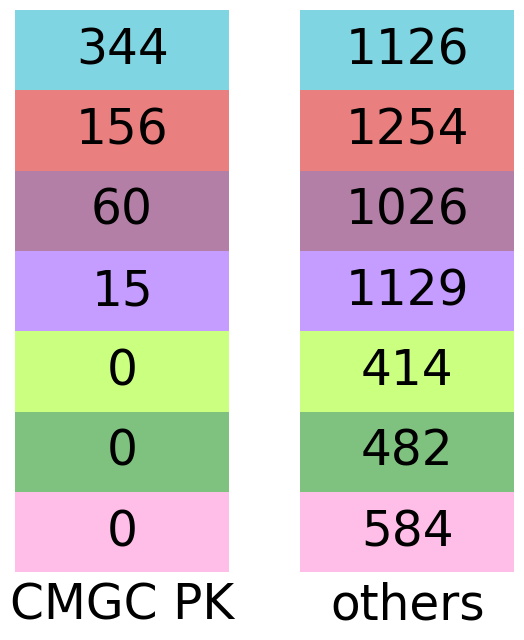

In [3]:
import pandas as pd
import os
from scripts.family_analysis import analyze_family, make_scatterplot

base = os.getcwd()
path_to_dir = "/results/figure4"
path_to_coords = f'{base}{path_to_dir}/latent_coords.csv'
path_to_labs = f'{base}{path_to_dir}/cluster_annotation_labels.csv'

data = pd.read_csv(path_to_labs, index_col=0)
coords = pd.read_csv(path_to_coords, index_col=0)

make_scatterplot(coords, data, 'alpha-carbonic anhydrase')
analyze_family('alpha-carbonic anhydrase', data, 'agglomerative', 'ACA')

make_scatterplot(coords, data, 'G-protein coupled receptor 1')
analyze_family('G-protein coupled receptor 1', data, 'agglomerative', 'GPCR1')

make_scatterplot(coords, data, 'CMGC Ser/Thr protein kinase')
analyze_family('CMGC Ser/Thr protein kinase', data, 'agglomerative', 'CMGC PK')